In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [8]:
# 변수명 바꾸기
welfare = welfare.rename(
    columns = {'h14_g3'    : 'sex',           # 성별
               'h14_g4'    : 'birth',         # 태어난 연도
               'h14_g10'   : 'marriage_type', # 혼인 상태
               'h14_g11'   : 'religion',      # 종교
               'p1402_8aq1': 'income',        # 월급
               'h14_eco9'  : 'code_job',      # 직업 코드
               'h14_reg7'  : 'code_region'})  # 지역 코드

## 성별 변수 검토 및 전처리하기

In [9]:
welfare['sex'].dtypes  # 변수 타입 출력

dtype('float64')

In [10]:
welfare['sex'].value_counts()  # 빈도 구하기

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [11]:
# 이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [12]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex']==9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [13]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

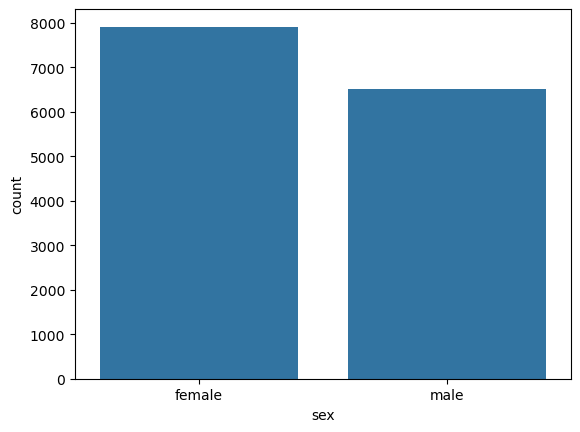

In [14]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex')

## 월급 변수 검토 및 전처리하기

In [15]:
welfare['income'].dtypes  # 변수 타입 출력

dtype('float64')

In [16]:
welfare['income'].describe()  # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

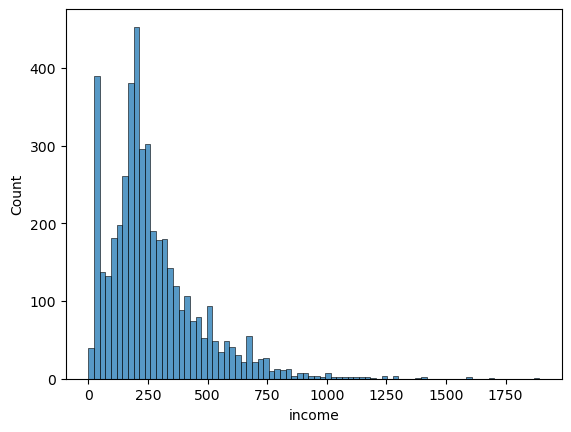

In [17]:
sns.histplot(data = welfare, x = 'income')  # 히스토그램 만들기

In [18]:
welfare['income'].describe()  # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [19]:
welfare['income'].isna().sum() # 결측치 확인

9884

In [20]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income']==9999, np.nan,
                             welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

## 성별에 따른 월급 차이 분석하기

In [21]:
# 성별 월급 평균표 만들기
# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = 'income')\
                    .groupby('sex', as_index = False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

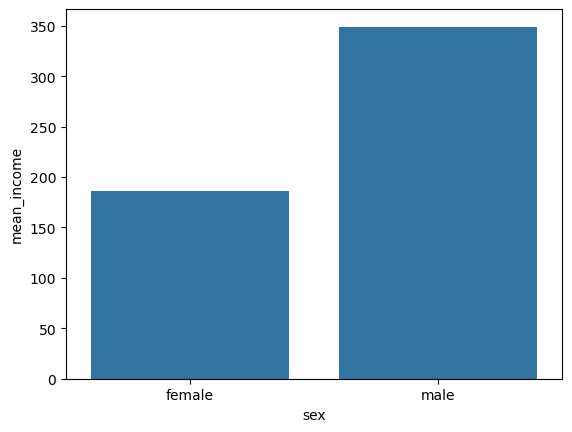

In [22]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')